In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout,Conv2D, Flatten, MaxPooling2D
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [45]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
import cv2
import os
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Train Test train_test_split

X_train = []
y_train = []
image_size = 150
labels = ['no_tumor', 'pituitary_tumor', 'meningioma_tumor', 'glioma_tumor' ]


for i in labels:
    folderPath = os.path.join(r'C:\Users\HP\Desktop\DEEP learning\Brain-Tumor-Classificatio\Training', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        y_train.append(i)
    

for i in labels:
    folderPath = os.path.join(r'C:\Users\HP\Desktop\DEEP learning\Brain-Tumor-Classificatio\Testing', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        y_train.append(i)
    
X_train = np.array(X_train)
y_train = np.array(y_train)

In [34]:
X_train, y_train = shuffle(X_train, y_train, random_state=101)
X_train.shape

(3264, 150, 150, 3)

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,test_size=0.2,random_state=101)

In [37]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = tf.keras.utils.to_categorical(y_train_new)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test_new)

In [39]:
# Creating convolutional neural network
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))  # 4 output classes thus 4 {disease types}




C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 34, 34, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 2, 2, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,153,732 (4.40 MB)

 Trainable params: 1,153,732 (4.40 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [54]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=13)

Epoch 1/13
66/66 ━━━━━━━━━━━━━━━━━━━━ 39s 589ms/step - accuracy: 0.9540 - loss: 0.1529 - val_accuracy: 0.9101 - val_loss: 0.3015
Epoch 2/13
66/66 ━━━━━━━━━━━━━━━━━━━━ 39s 584ms/step - accuracy: 0.9511 - loss: 0.1292 - val_accuracy: 0.9216 - val_loss: 0.2809
Epoch 3/13
66/66 ━━━━━━━━━━━━━━━━━━━━ 39s 593ms/step - accuracy: 0.9559 - loss: 0.1197 - val_accuracy: 0.9216 - val_loss: 0.3158
Epoch 4/13
66/66 ━━━━━━━━━━━━━━━━━━━━ 47s 722ms/step - accuracy: 0.9531 - loss: 0.1222 - val_accuracy: 0.9235 - val_loss: 0.2970
Epoch 5/13
66/66 ━━━━━━━━━━━━━━━━━━━━ 42s 639ms/step - accuracy: 0.9401 - loss: 0.1836 - val_accuracy: 0.9063 - val_loss: 0.3389
Epoch 6/13
66/66 ━━━━━━━━━━━━━━━━━━━━ 41s 628ms/step - accuracy: 0.9540 - loss: 0.1335 - val_accuracy: 0.9235 - val_loss: 0.3157
Epoch 7/13
66/66 ━━━━━━━━━━━━━━━━━━━━ 35s 531ms/step - accuracy: 0.9602 - loss: 0.1603 - val_accuracy: 0.9025 - val_loss: 0.3078
Epoch 8/13
66/66 ━━━━━━━━━━━━━━━━━━━━ 32s 491ms/step - accuracy: 0.9425 - loss: 0.1658 - val_accu

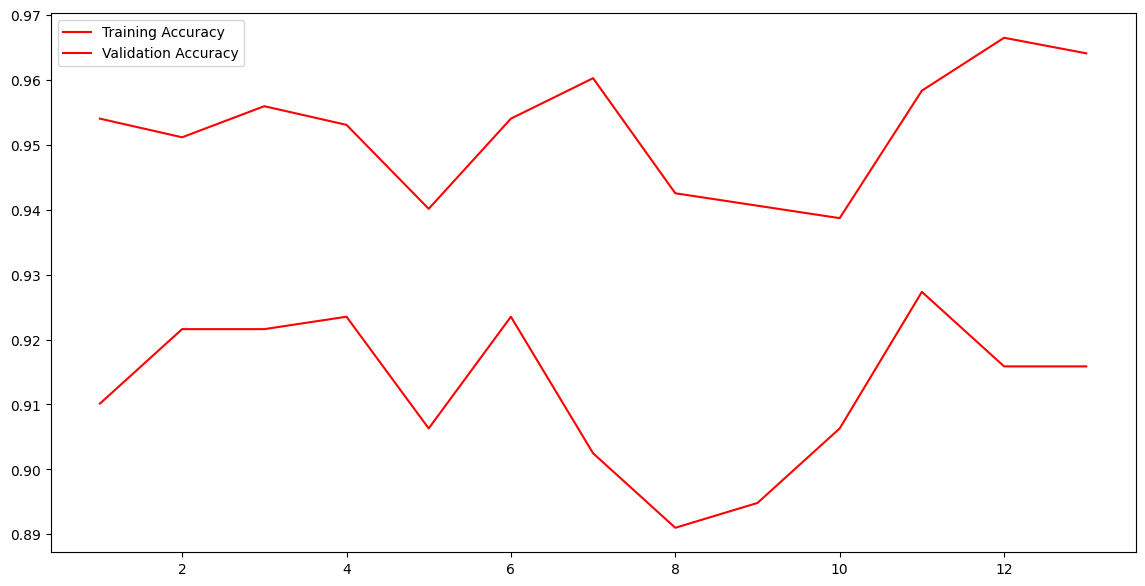

In [55]:
model.save("brain_tumor_classification.keras")

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize = (14, 7))
plt.plot(epochs,acc,'r', label='Training Accuracy')
plt.plot(epochs,val_acc,'r', label='Validation Accuracy')
plt.legend(loc = 'upper left')


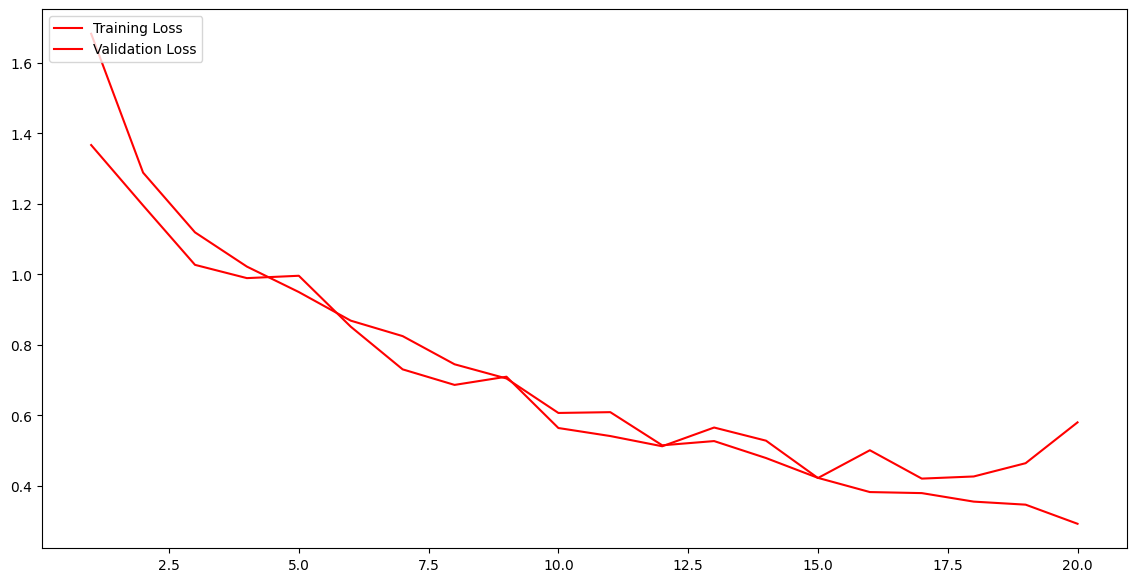

In [47]:

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize = (14, 7))
plt.plot(epochs,loss,'r', label='Training Loss')
plt.plot(epochs,val_loss,'r', label='Validation Loss')
plt.legend(loc = 'upper left')

In [ ]:
img = cv2.imread(r'C:\Users\HP\Desktop\DEEP learning\Brain-Tumor-Classificatio\Training\pituitary_tumor\p (2).jpg')
img = cv2.resize(img, (150, 150))
img_array = np.array(img)
img_array = img_array.reshape(1, 150, 150, 3)


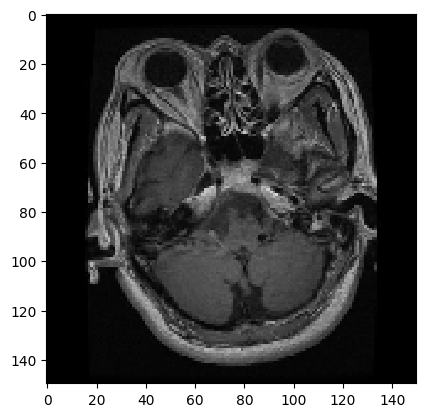

In [49]:
from tensorflow.keras.preprocessing import image
img = image.load_img(r'C:\Users\HP\Desktop\DEEP learning\Brain-Tumor-Classificatio\Training\pituitary_tumor\p (2).jpg', target_size=(150, 150))
plt.imshow(img, interpolation='nearest')
plt.show()

In [ ]:
a = model.predict(img_array)
print(a)
indices = a.argmax()

labels[indices]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
[[3.1387938e-06 9.9993896e-01 5.1553397e-05 6.3671328e-06]]
1


'pituitary_tumor'